In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM  # I use keras over Tensorflow 2, so I don't need extra Keras libraries.
from tensorflow.keras.models import Sequential  # Tensorflow includes Keras libraries after 2nd version of Tensorflow
from sklearn.preprocessing import MinMaxScaler  # If you have Tensorflow 1, please upgrade your library using:
                                              

In [37]:
data = pd.read_csv('AirPassengers.csv')

In [38]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [39]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']

In [40]:
type(data)

pandas.core.series.Series

In [41]:
data


0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [42]:
#Datamız ya dataframe olmalı yada 2 boyutlu array olmak zorunda minmaxscaler oyle kabul eder
data = np.array(data).reshape(-1,1)

In [43]:
type(data)

numpy.ndarray

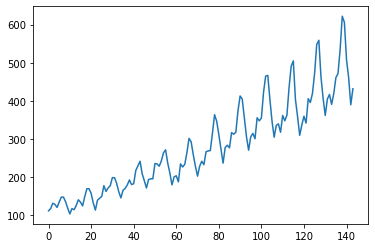

In [44]:
plt.plot(data)
plt.show()

#### Scale:

In [45]:
scaler = MinMaxScaler()


In [46]:
data= scaler.fit_transform(data)
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

#### Train Test Split:

In [47]:
len(data)

144

In [48]:
##144 datanın 100 ü train 44 ü test olacak
train = data[0:100,:]
test = data[100:,:]

In [49]:
# şimdi bir fonksiyon tanımlayacağız get_data  veri setini eğiti seti haline getirmeye yarıyor
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
steps=2

In [51]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)




In [52]:
# Im reshaping my sets for using in LSTM model..
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [53]:
# i will use a Sequential model with 2 hidden layers
# instead of neuons, LSTM networks have memory blocks that are connected through Layers
# The default sigmoid activaion function used for LSTM blocks


model = Sequential()
model.add(LSTM(128, input_shape=(1, steps))) # this is my first hidden layer with 128 memory blocks
model.add(Dense(64)) # this is my second hidden layer with 64 memory blocks
model.add(Dense(1)) # This is my output Layer 
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67072     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


### now train:

In [55]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 2/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 3/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 5/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 6/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 7/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 11/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 12/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 13/25
97/97 [==============================

In [56]:
y_pred = model.predict(X_test)

In [57]:
#we should rescale the prediction results, because our model gives us scaled predictions..
y_pred =scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

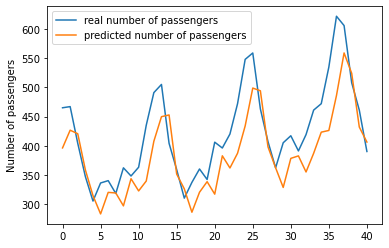

In [58]:
# plot real number of passengers and predictions...
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()